# Проверка гипотез для увеличения выручки интернет-магазина

Исследование на данных интернет-магазина: список сформулированных с помощью отдела маркетинга гипотез и результаты проведенного с 1 по 31 августа 2019 года A/B-теста.

Целью исследования является приоритизация гипотез и анализ полученных результатов A/B-теста для увеличения выручки интернет-магазина. 

В ходе исследования будет проведена подготовка данных, построены графики изменений выручки, количества заказов и среднего чека, а также проведен расчет статистическиой значимости различий в среднем количестве заказов и в среднем чеке между группами А и В по "сырым" и по "очищенным" от аномалий данным.



## Приоритизация гипотез

Импортируем библиотеки.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

In [2]:
pd.set_option('display.max_colwidth', None) #настраиваем вывод таблиц, чтобы видеть всю информацию

Прочитаем файл с гипотезами.

In [3]:
hypothesis = pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


В нашем распоряжении 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort. 

Приведем названия столбцов к общепринятому виду.

In [4]:
hypothesis.columns = [col.lower() for col in hypothesis.columns] 

### Фреймфорк ICE

Применим фреймфорк ICE для приоритизации гипотез.

ICE score =  impact * confidence / effort

In [5]:
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

In [6]:
print(hypothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Используем еще один метод, после чего сформулируем выводы.

### Фреймфорк RICE

Теперь применим фреймфорк RICE для приоритизации гипотез.

RICE score =  reach * impact * confidence / effort

In [7]:
hypothesis['RICE'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach']) / hypothesis['efforts']

In [8]:
print(hypothesis.loc[:, ['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

### Выводы по приоретизации гипотез

После преоритизации методов ICE мы получили топ-3 способа увеличения выручки:
- `скидка на день рождения`
- `добавление двух новых каналов привлечения трафика`
- `добавление формы подписки на все страницы`

Однако способ ICE не учитывает, какую часть пользователей затронет это измнение. При использовании метода RICE, учитывающего этот параметр, топ-3 выглядит иначе:
- `добавление формы подписки на все страницы`
- `добавление блока рекомендаций на главную страницу`
- `добавление двух новых каналов привлечения трафика`

На первые места выходят те способы, которые коснутся максимального количества клиентов (то, что будет выведено на главной страницы, а также новые каналы привлечения). Начинать работать над увеличением выручки следует именно с них.


## Анализ A/B-теста

После проведения A/B-теста мы получили результаты, которые описаны в двух файлах. Прочитаем первую таблицу, содержающую информацию о заказах.

In [9]:
order = pd.read_csv('orderss.csv')
order.info()
order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
print('Количество явных дубликатов:', order.duplicated().sum())

Количество явных дубликатов: 0


Поменяем названия столбцов на более читаемый вид.

In [11]:
order = order.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})

Структура таблицы:

- `transaction_id` — идентификатор заказа,
- `visitor_id` — идентификатор пользователя, совершившего заказ,
- `date` — дата, когда был совершён заказ,
- `revenue` — выручка заказа,
- `group` — группа A/B-теста, в которую попал заказ.

Приведем столбец **date** к типу datetime.

In [12]:
order['date'] = pd.to_datetime(order['date'])

In [13]:
print(f"Тест проводился с {order['date'].min()} по {order['date'].max()}")

Тест проводился с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


Прочитаем вторую таблицу, содержающую информацию о размерах когорт.

In [14]:
visitors = pd.read_csv('visitors.csv')
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
print('Количество явных дубликатов:', visitors.duplicated().sum())

Количество явных дубликатов: 0


Структура таблицы:

- `date` — дата,
- `group` — группа A/B-теста, в которую попал заказ,
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

Приведем столбец **date** к типу datetime.

In [16]:
visitors['date'] = pd.to_datetime(visitors['date'])

In [17]:
print(f"Тест проводился с {visitors['date'].min()} по {visitors['date'].max()}") 
#проверяем, совпадут ли даты проведения теста, т.е. нет ли ошибки в датах

Тест проводился с 2019-08-01 00:00:00 по 2019-08-31 00:00:00


Проверим корректность разбиения пользователей на группы. Необходимо понять, есть ли пользователи, попавшие в обе группы.

In [18]:
visitor_ids = np.intersect1d(order[order['group'] == 'A']['visitor_id'], order[order['group'] == 'B']['visitor_id'])
print('Количество пользователей, попавших в обе группы:', len(visitor_ids))

Количество пользователей, попавших в обе группы: 58


Исключим из данных этих пользователей и посмотрим, какую часть данных мы теряем.

In [19]:
orders = order[~order['visitor_id'].isin(visitor_ids)]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1016 non-null   int64         
 1   visitor_id      1016 non-null   int64         
 2   date            1016 non-null   datetime64[ns]
 3   revenue         1016 non-null   int64         
 4   group           1016 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 47.6+ KB


В таблице было 1197 строк, стало 1016. Датафрейм уменьшился на 15%. Данных стало меньше, но задвоенных пользователей лучше исключить, потому что они уже имели опыт покупки и их поведение может не быть связано с нововведениями.

Предобработка данных окончена, переходим к анализу A/B-теста.

### График кумулятивной выручки по группам

Построим график кумулятивной выручки  по дням по группам. 

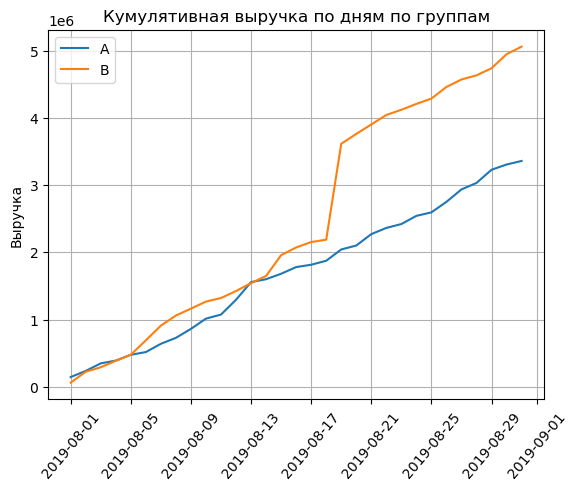

In [20]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=50)
plt.title('Кумулятивная выручка по дням по группам')
plt.ylabel('Выручка')
plt.grid()
plt.legend();


Выручка в группе А растет равномерно. В группе В наблюдается резкий всплеск примерно в середине месяца, который длится несколько дней, далее же рост выручки снова становится равномерным. Вероятно, в те дни увеличилось количество заказов, либо заказы были с высоким средним чеком. Рассмотрим данные по средним чекам далее.

### График кумулятивного среднего чека по группам

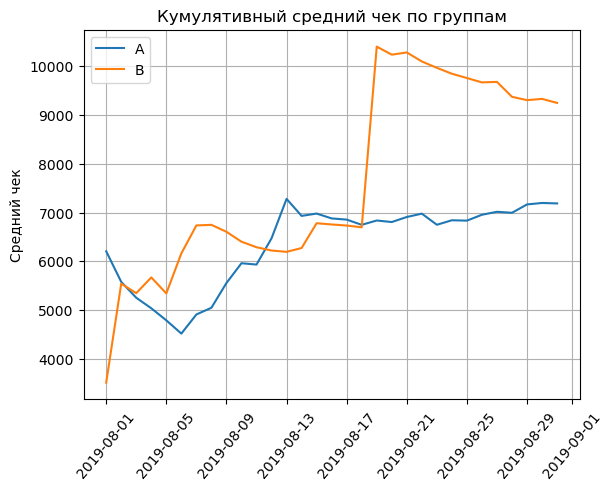

In [21]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=50)
plt.title('Кумулятивный средний чек по группам')
plt.ylabel('Средний чек')
plt.grid()
plt.legend(loc='upper left');

Предположение подтвердилось: в группе B в середине месяца (начиная с 18 августа) вырос средний чек. В целом в группе В средний чек в течение месяца значительно вырос. В группе А средний чек остается примерно на одном и том же уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека. 

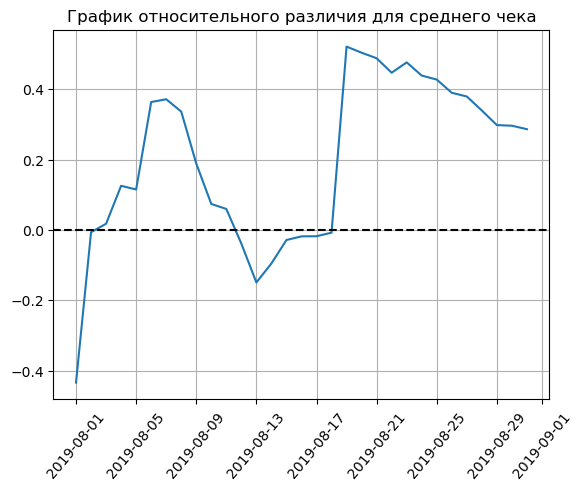

In [22]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 

plt.xticks(rotation=50)
plt.title('График относительного различия для среднего чека')
plt.grid()

Чеки группы В почти всегда выше чеков группы А за исключением небольшого периода с 11 по 15 августа. При этом в процентом выражении это различие достаточно незначительно.

### График кумулятивного среднего количества заказов на посетителя по группам

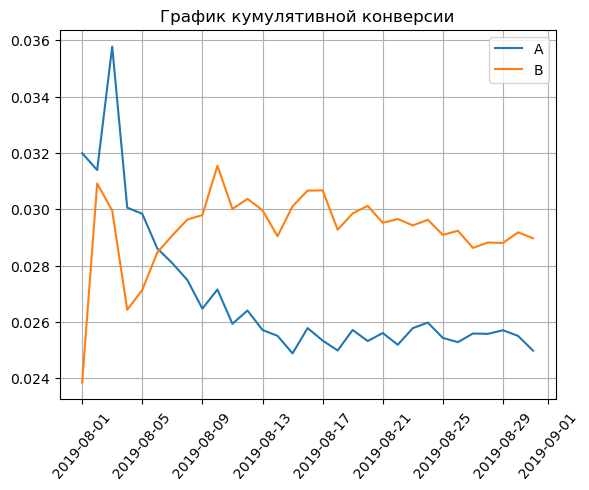

In [23]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=50)
plt.title('График кумулятивной конверсии')
plt.grid()

Конверсия по обеим группам колеблется в районе 3-3,7%. До 5 августа конверсии в обеих группах сильно колебались в пределах этих значений, далее начала приходить к своим средним значениям, и начиная с 9 августа стабилизировались. В группе В конверсия выше. Не так стабильна, как в А, но в целом значения колеблются незначительно. 

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

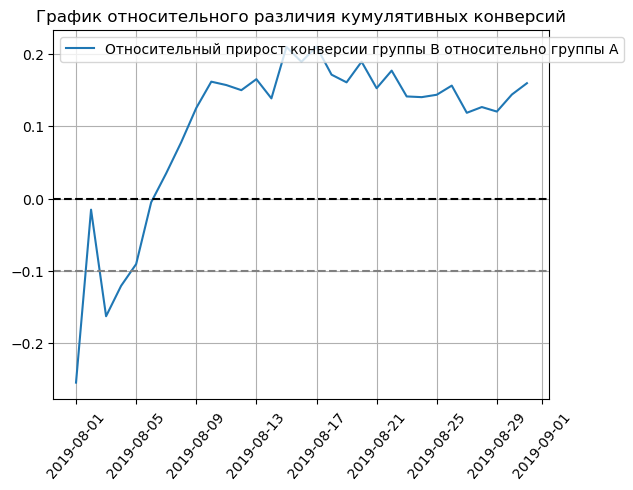

In [24]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend(loc='upper left')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')

plt.xticks(rotation=50)
plt.title('График относительного различия кумулятивных конверсий')
plt.grid()

В начале теста группа B проигрывала группе A, затем вырвалась вперёд. В середине месяца относительный прирост достиг максимума, далее начал немного падать.

### График количества заказов по пользователям

In [25]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['visitor_id', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

     visitor_id  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


Максимальное количество совершенных пользователями заказов - 3.

Построим гистрограмму и точечный график распределения количества заказов на одного пользователя.

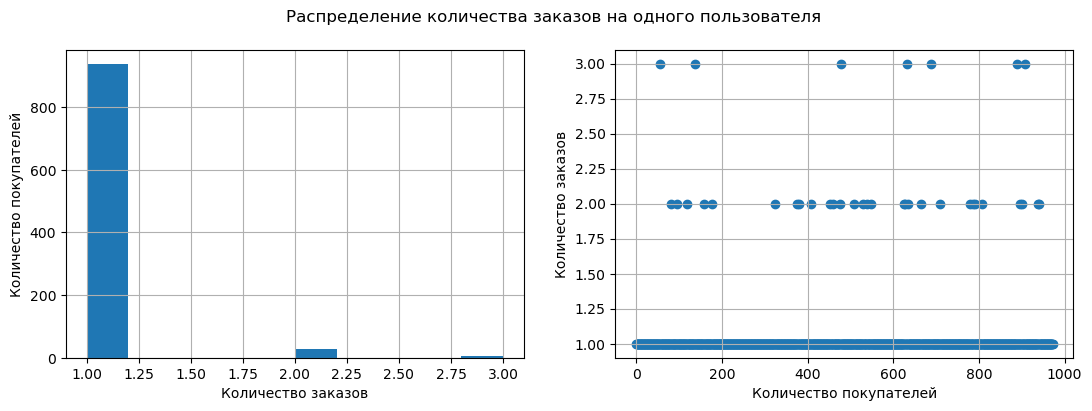

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].hist(ordersByUsers['orders'])
axes[0].grid()
axes[0].set_xlabel('Количество заказов')
axes[0].set_ylabel('Количество покупателей')

x_values = pd.Series(range(0,len(ordersByUsers)))
axes[1].scatter(x_values, ordersByUsers['orders'])
axes[1].grid()
axes[1].set_xlabel('Количество покупателей')
axes[1].set_ylabel('Количество заказов')
plt.suptitle('Распределение количества заказов на одного пользователя');

По графикам можно сказать, что все, что выше двух заказов можно считать выбросами. Но для окончательного решения посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

### Расчет 95-ого и 99-ого перцентилей количества заказов на пользователя

In [27]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[1. 2.]


До 5% покупателей оформляли больше, чем 1 заказа. И только 1% пользователей оформлял заказ более 2 раз.
В соответствии с расчетом перцентилей и ранее полученных графиков, примем 2 заказа за верхнюю границу числа заказов.


### График стоимостей заказов

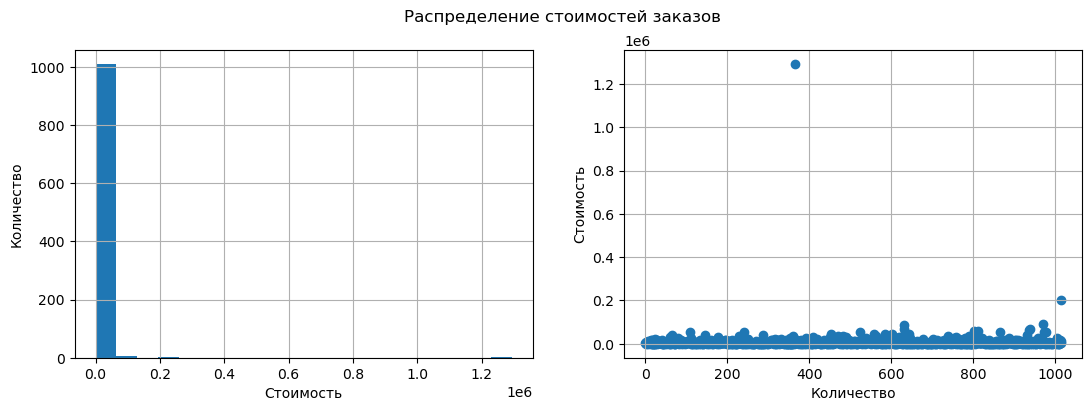

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].hist(orders['revenue'], bins = 20) 
axes[0].grid()
axes[0].set_xlabel('Стоимость')
axes[0].set_ylabel('Количество')

x_values = pd.Series(range(0,len(orders['revenue'])))
axes[1].scatter(x_values, orders['revenue']) 
axes[1].grid()
axes[1].set_xlabel('Количество')
axes[1].set_ylabel('Стоимость')
plt.suptitle('Распределение стоимостей заказов');

Есть всего пара выбросов, в остальном данные однородны. Посмотрим на графике на другом масштабе (стоимостью до 100 000).

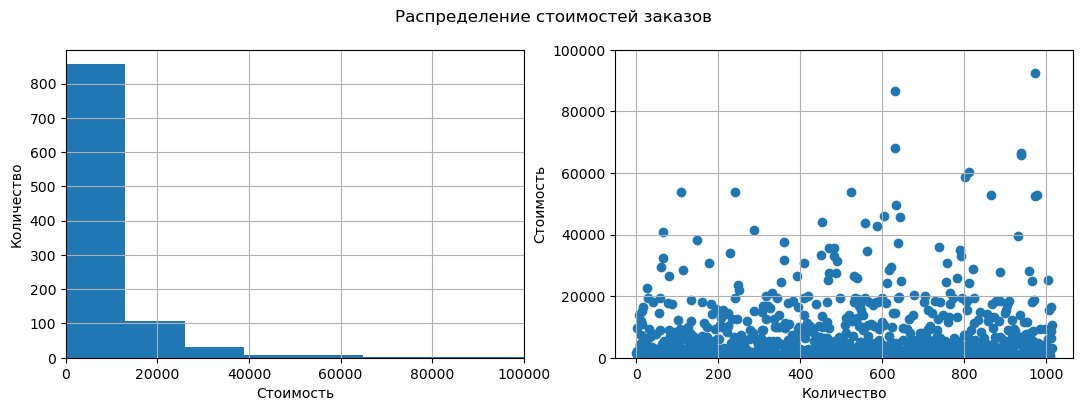

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].hist(orders['revenue'],bins=100) 
axes[0].grid()
axes[0].set_xlabel('Стоимость')
axes[0].set_ylabel('Количество')
axes[0].set_xlim([0, 100000])

x_values = pd.Series(range(0,len(orders['revenue'])))
axes[1].scatter(x_values, orders['revenue']) 
axes[1].grid()
axes[1].set_xlabel('Количество')
axes[1].set_ylabel('Стоимость')
axes[1].set_ylim([0, 100000])
plt.suptitle('Распределение стоимостей заказов');

Аномально дорогие заказы могут сильно испортить результаты теста, поэтому в дальнейшем будем от них  избавляться.

Посчитаем 95-й и 99-й перцентили стоимостей заказов. 

### Расчет 95-ого и 99-ого перцентилей стоимости заказов

In [30]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более 5% заказов дороже 26 785 и не более 1% дороже 53 904.

В соответствии с расчетом перцентилей и ранее полученных графиков, примем стоимость 54 000 за верхнюю границу стоимости заказа, а все заказы более высокой стоимостью будем считать аномалиями.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы. <br>
H0: различий в среднем количестве заказов между группами A и B нет. 
<br>H1: различия в среднем между группами A и B есть.

In [31]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitor_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5) 

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,19,142779,17,59758,19,142779,17,59758,719,713,719,713
1,2019-08-02,18,91602,23,162043,37,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,61,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,72,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,94,474413,89,475648,756,707,3318,3280


Названия столбцов данных:

- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A,
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A,
- `ordersPerDateB` — количество заказов в выбранную дату в группе B,
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B,
- `ordersCummulativeA` — суммарное число заказов до выбранной даты включительно в группе A,
- `revenueCummulativeA` — суммарная выручка до выбранной даты включительно в группе A,
- `ordersCummulativeB` — суммарное количество заказов до выбранной даты включительно в группе B,
- `revenueCummulativeB` — суммарная выручка до выбранной даты включительно в группе B,
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A,
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B,
- `visitorsCummulativeA` — количество пользователей до выбранной даты включительно в группе A,
- `visitorsCummulativeB` — количество пользователей до выбранной даты включительно в группе B.

Посчитаем статистическую значимость различия в среднем количестве заказов между группами.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами **visitor_id** и **orders**. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [32]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули.

In [33]:
pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders').head()
  

0    0
1    0
2    0
3    0
4    0
Name: orders, dtype: int64

In [34]:
[ordersByUsersA['orders'].head(),pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders').head()]

[0    1
 1    1
 2    1
 3    1
 4    1
 Name: orders, dtype: int64,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: orders, dtype: int64]

In [35]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Применим статистический критерий Манна-Уитни.

In [36]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Относительный прирост среднего числа заказов группы B:', "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.011
Относительный прирост среднего числа заказов группы B: 0.160


p-value 0.011 меньше уровня статистической значимости 0.05, следовательно мы отвергаем нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет. Относительный выигрыш группы В над группой А составляет 16%.

Проверим статистическую значимость различий в среднем чеке между сегментами. 

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

H0: различий в среднем чеке между группами A и B нет. <br>
H1: различия в среднем чеке между группами A и B есть. 

Применим статистический критерий Манна-Уитни.

In [37]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительный прирост среднего чека группы B:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.829
Относительный прирост среднего чека группы B: 0.287


P-value значительно больше уровня статистической значимости 0.05. Значит, мы не можем отвергнуть нулевую гипотезу и сказать, что средний чек между группами отличается. Наблюдаемое различие в 28% не является стастистически значимым.

Очистим данные и уберем всех пользователей, которые совершили более 2 заказов или совершили заказы стоимостью более 54 000.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Посчитаем количество аномальных пользователей.

In [38]:
order_lim = 2
revenue_lim = 54000

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_lim]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > order_lim]['visitor_id'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
33      249864742
58      611059232
949     887908475
744     888512513
Name: visitor_id, dtype: int64
16


В тест попали 16 аномальных покупателей.

Подготовим выборки количества заказов по пользователям по группам теста.

In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [40]:
print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.007
Относительный прирост среднего числа заказов группы B: 0.189


p-value незначительно уменьшился до 0.007 и остался меньше уровня статистической значимости 0.05 (отвергаем нулевую гипотезу о том, что различий в среднем количестве заказов между группами нет). Относительный выигрыш группы В над группой А увеличился с 16 до 18.9%.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Посмотрим на результаты по среднему чеку по данным без аномалий.

In [41]:
print(
    'p-value:', '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительный прирост среднего чека группы B:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


p-value: 0.788
Относительный прирост среднего чека группы B: -0.032


P-value слегка уменьшился. А разрыв между средними чеками изменился с 28% в пользу группы В до 3% в пользу группы А. Аномальные значения повлияли на результаты, однако тесты сработали одинаково и на "сырых", и на "очищенных" данных.

### Принятие решений по результатам A/B-теста

По результатам теста и по сырым данным, и по данным без аномалий, мы отвергаем гипотезу о том, что разницы между количеством заказов нет. Подтверждаем гипотезу о том, что статистическое различие в среднем между группами есть: количество заказов в группе В по очищенным данным больше на 16%.

Средний чек и по сырым и по очищенным данным статистически не отличается. При этом по очищенным данным отличий не нашлось и по наблюдениям. Таким образом, мы видим, что в группах нет статистически значимого различия между средним чеком, при этом в группе В наблюдается значительный рост числа заказов относительно группы А. 

Кумулятивная выручка и среднее количество заказов на посетителя по группе В выше, что подтверждается статистическими проверками. 

По всем полученным данным группа В показывает более высокие результаты, чем группа А. 

Мы совокупной информации, полученной в ходе исследования, мы останавливаем тест и признаем его успешным. При возросшем количестве заказов с сохранившимся средним чеком выручка будет также расти, и наша цель по увеличению выручки будет достигнута.
